## Final Project Submission

Please fill out:
* Student name: Kemboi Elly Kiplimo
* Student pace: Full time
* Scheduled project review date/time: 
* Instructor name: Winnie Anyiso
* Blog post URL:


In [ ]:
# Your code here - remember to use markdown cells for comments as well!

1. Business Understanding

a) Introduction

There is a need for relevant advise on home renovations in the context of a real estate business that caters to homeowners buying and selling properties. This information can assist homeowners in understanding how various renovations can potentially increase the projected value of their houses.

b) Problem Statement

The task at hand is to create a prediction model that can accurately evaluate the influence of various home modifications on a property's total value. We hope to deliver practical insights to homeowners looking to increase the market worth of their houses by researching historical data on home improvements and their associated property prices.

c) Main Objective

The primary goal of this research is to develop a credible predictive model that uses linear regression techniques to assess the impact of various home modifications on the estimated value of a property. The algorithm will provide accurate forecasts based on previous data, allowing homeowners to make informed judgments regarding potential upgrades.




d)Specific Objective

1. Compile a comprehensive dataset comprising information on previous home renovations and property prices.
2. Conduct exploratory data analysis to better understand the connections between various restoration aspects and property prices.
3. To ensure accurate and dependable model training, preprocess and clean the dataset.
4. Develop a prediction model using linear regression modeling techniques to estimate the impact of home modifications on property prices.
5. To assure the model's dependability and accuracy, evaluate its performance using relevant evaluation metrics.
6. Based on the model's projections, provide homeowners with precise recommendations and insights, allowing them to make informed decisions regarding future repairs.


e) Experimental Design

1. Data Collection
2. Read and check the data
3. Cleaning the data
4. Exploratory Data Analysis
5. Data modelling and model performance evaluation
6. Use the model to make predictions
7. Conclusions and Recommendations
8. Deploy the model

f) Data Understanding

2. Importing Libraries

In [83]:
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np
from sklearn import preprocessing 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

3) Loading the data

In [2]:
df = pd.read_csv('data/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


4) Data Cleaning and Ananlysis

In [7]:
#checking the first 5 rows in the dataset 'df'
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [8]:
print("The dataset has {num_columns} columns and {num_rows} rows".format(num_columns = df.shape[1],num_rows = df.shape[0]))

The dataset has 21 columns and 21597 rows


In [26]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

Checking for the NaN values and dropping them

In [25]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [24]:
#df.drop("waterfront",axis = 1 , inplace =True)

We drop the waterfront column with NaN values

In [13]:
#df.dropna(inplace=True)

In [27]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,NONE,Average,11 Excellent,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,NONE,Average,7 Average,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819


In [29]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [34]:
#df.drop(['view'], axis=1, inplace =True)
#df

In [36]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,Average,11 Excellent,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,Average,7 Average,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819


We've dropped the 'view' column

In [37]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

Id	Unique Id for each house sold
Date	Date of House sale
price	House sale price
bedrooms	Number of bedrooms
bathrooms	Number of bathrooms, where .5 accounts for a bathroom with a toilet but no shower
sqft_living	Square footage of interior living space of the house
sqft_lot	Land area in square feet
floors	Number of floors
waterfront	Label to indicate whether the house was with waterfront or not
view	Labels from 0 to 4 to indicate the view of house.
condition	Labels from 1 to 5 to indicate the condition of the house
grade	Labels from 1 to 13 to indicate the quality levels of construction and design, with 1 to 3 falls in the lowest level, 7 in the average label, and 11-13 in the highest quality level.
sqft_above	Above ground level interior housing space in square feet.
sqft_basement	Below ground level interior housing space in square feet.
yr_built	The year of construction of the house ranging from 1900 to 2015
yr_renovated	The year of last renovation of the house ranging from 1934 to 2015
zipcode	Zipcode area of the house
lat	Latitude
long	Longitude
sqft_living15	The interior living space in square feet for the nearest 15 neighbors
sqft_lot15	The land area in square feet for the nearest 15 neighbors

In [39]:
df.info

<bound method DataFrame.info of                id        date      price  bedrooms  bathrooms  sqft_living  \
1      6414100192   12/9/2014   538000.0         3       2.25         2570   
3      2487200875   12/9/2014   604000.0         4       3.00         1960   
4      1954400510   2/18/2015   510000.0         3       2.00         1680   
5      7237550310   5/12/2014  1230000.0         4       4.50         5420   
6      1321400060   6/27/2014   257500.0         3       2.25         1715   
...           ...         ...        ...       ...        ...          ...   
21591  2997800021   2/19/2015   475000.0         3       2.50         1310   
21592   263000018   5/21/2014   360000.0         3       2.50         1530   
21593  6600060120   2/23/2015   400000.0         4       2.50         2310   
21594  1523300141   6/23/2014   402101.0         2       0.75         1020   
21596  1523300157  10/15/2014   325000.0         2       0.75         1020   

       sqft_lot  floors  condit

The dataset has 15762 rows and 19 columns after dropping the rows and columns with missing values

Statistical Analysis

We are going to perform exploratory data analysis EDA, by finding  the linearity of different columns in the dataset like price and bedrooms, price and bathroom. We are also going to check for correlation in the dataset

We will define 'price' as the independent variable and bedrooms, bathrooms, floors and etc as independent variables

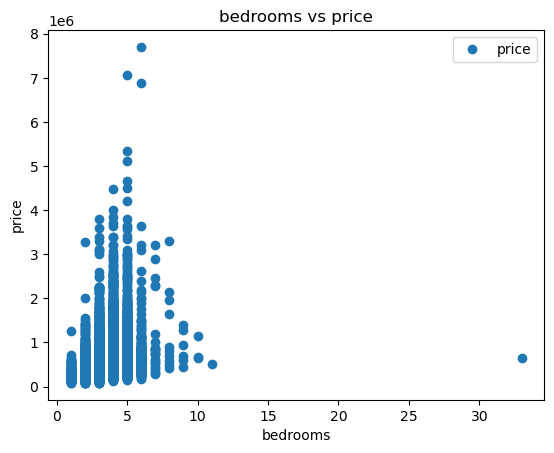

,bedrooms,price
bedrooms,1.000000,0.305489
price,0.305489,1.000000


In [41]:
df.plot(x='bedrooms', y='price', style='o')
plt.title('bedrooms vs price')
plt.xlabel('bedrooms')
plt.ylabel('price')
plt.show()
df[['bedrooms','price']].corr()

From the visual above it appears that there is no correlation between price and bedrooms

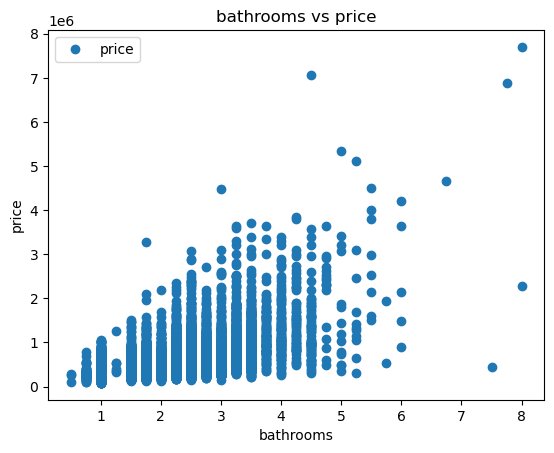

,bathrooms,price
bathrooms,1.000000,0.526155
price,0.526155,1.000000


In [43]:
df.plot(x='bathrooms', y='price', style='o')
plt.title('bathrooms vs price')
plt.xlabel('bathrooms')
plt.ylabel('price')
plt.show()
df[['bathrooms','price']].corr()

It also appears that price and bathrooms have no correlation

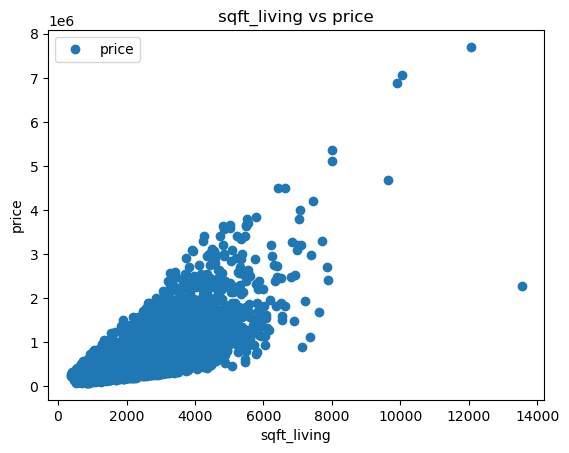

,sqft_living,price
sqft_living,1.000000,0.706189
price,0.706189,1.000000


In [44]:
df.plot(x='sqft_living', y='price', style='o')
plt.title('sqft_living vs price')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.show()
df[['sqft_living','price']].corr()

From the visual above it appears there is a positive correlation. When price increases the living room space also increases.

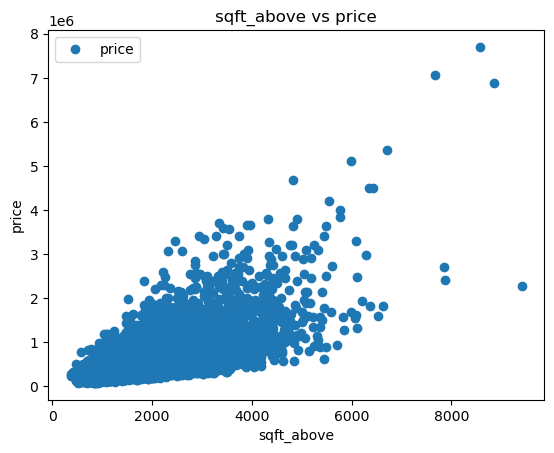

,sqft_above,price
sqft_above,1.000000,0.612014
price,0.612014,1.000000


In [45]:
df.plot(x='sqft_above', y='price', style='o')
plt.title('sqft_above vs price')
plt.xlabel('sqft_above')
plt.ylabel('price')
plt.show()
df[['sqft_above','price']].corr()

It appears that there is a positve correlation between price and sqft_above (above ground level interior housing space in square feet)

Splitting the data

In [69]:
ind_var = list(df.iloc[:,1:].values) 
dep_var = df.price.values 

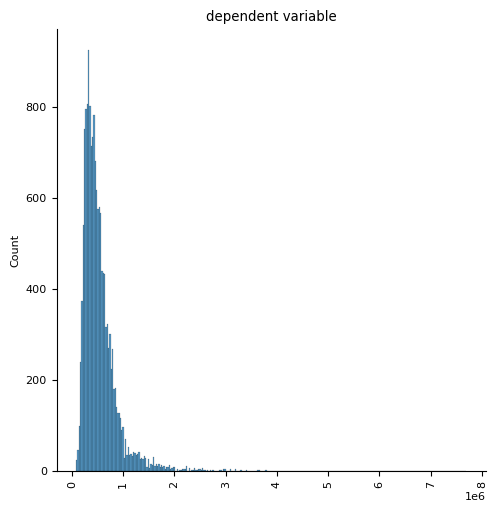

In [74]:
sns.displot(dep_var);
plt.xticks(rotation=90);
plt.title("dependent variable");

In [80]:
ind_train = np.array(ind_train)
ind_test = np.array(ind_test)
dep_train = np.array(dep_train)
dep_test = np.array(dep_test)

In [82]:
#ind_train ,ind_test , dep_train ,dep_test = train_test_split(ind_var,dep_var,test_size=0.2,random_state=10)
ind_train = np.array(ind_train)
ind_test = np.array(ind_test)
dep_train = np.array(dep_train)
dep_test = np.array(dep_test)
print(ind_train.shape,ind_test.shape,dep_train.shape,dep_test.shape)

(12609, 17) (3153, 17) (12609,) (3153,)


In [86]:
model_line = LinearRegression(normalize=True,fit_intercept=True,n_jobs=1)
model_line.fit(ind_train,dep_train)

dep_train_pred = model_line.predict(dep_train)
dep_pred = model_line.predict(ind_test)


print("Train score:",r2_score(ind_train, dep_train_pred))
print("Test score:",r2_score(ind_test,dep_pred))

TypeError: LinearRegression.__init__() got an unexpected keyword argument 'normalize'

Recommendations

1. From analysis, I would recommend a person to consider the size of the living room size when deciding on the prices
2. While deciding on the price of a house a person should also consider the size of the house from above the ground. Say like if the height is great the value iis considered high